In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# universidad = 'UNIVERSIDAD DISTRITAL"FRANCISCO JOSE DE CALDAS"-BOGOTÁ D.C.'

In [4]:
UD_df = pd.read_csv("raw_data/ud.csv")
UD_df.columns

Index(['PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_TIPODOCUMENTO', 'ESTU_PAIS_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_MCPIO_RESIDE', 'ESTU_CODDANE_COLE_TERMINO',
       'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_COD_DEPTO_PRESENTACION',
       'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION',
       'INST_CARACTER_ACADEMICO', 'ESTU_NUCLEO_PREGRADO',
       'ESTU_INST_DEPARTAMENTO', 'ESTU_INST_CODMUNICIPIO',
       'ESTU_INST_MUNICIPIO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO',
       'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_DEPTO_PRESENTACION',
       'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION',
       'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO',
       'ESTU_HORASSEMANATRABAJA', 'ESTU_SNIES_PRGMACADEMICO',
       'ESTU_PRIVADO_LIBERTAD', 'ESTU_NACIONALIDAD', 'ESTU_ESTUDIANTE',
       'ESTU_GENERO',

In [5]:
# extraer las columnas 
# ESTU_DEPTO_RESIDE -------------------- ¿Solo los de Bogotá? (No, todos los departamentos)
# ESTU_PRGM_ACADEMICO ------------------ ¿Dejo el programa académico? ---- (Solo ingenieria)
# ESTU_HORASSEMANATRABAJA -------------- ¿Cuanto tiempo trabaja a la semana? X
# ESTU_ESTUDIANTE ---------------------- ¿Es estudiante o es individual? ---- (eliminar los individuales)
# ESTU_GENERO -------------------------- ¿Genero? X
# ESTU_FECHANACIMIENTO ----------------- ¿Fecha de nacimiento? X
# ESTU_PAGOMATRICULAPROPIO ------------- ¿Paga usted mismo su matricula? x
# FAMI_EDUCACIONPADRE ------------------ ¿Nivel de estudio del padre? X
# FAMI_TIENEAUTOMOVIL ------------------ ¿Tiene automovil? X
# FAMI_TIENELAVADORA ------------------- ¿Tiene lavadora? X
# FAMI_ESTRATOVIVIENDA ----------------- ¿Estrato de la vivienda? X
# FAMI_TIENECOMPUTADOR ----------------- ¿Tiene computador? X
# FAMI_TIENEINTERNET ------------------- ¿Tiene internet? X
# FAMI_EDUCACIONMADRE ------------------ ¿Nivel de estudio de la madre? X
# MOD_RAZONA_CUANTITAT_PUNT ------------ ¿Puntaje Modulo Razonamiento Cuantitativo?
# MOD_COMUNI_ESCRITA_PUNT -------------- ¿Puntaje Modulo Comunicación Escrita?
# MOD_LECTURA_CRITICA_PUNT ------------- ¿Puntaje Modulo Lectura Crítica?
# MOD_INGLES_PUNT ---------------------- ¿Puntaje Modulo Inglés?
# MOD_COMPETEN_CIUDADA_PUNT ------------ ¿Puntaje Modulo Competencias Ciudadanas?
# (calcular edad y calcular y el rendimiento en la prueba)
# Todo en mayusculas
columns = ['PERIODO','ESTU_DEPTO_RESIDE', 'ESTU_PRGM_ACADEMICO', 'ESTU_HORASSEMANATRABAJA', 'ESTU_ESTUDIANTE', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONMADRE', 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_COMUNI_ESCRITA_PUNT', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_INGLES_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT']
print(len(columns))
UD_df = UD_df[columns]





20


In [6]:
# conocer valores nulos, tipos de datos, en blanco, etc
UD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PERIODO                    10600 non-null  int64  
 1   ESTU_DEPTO_RESIDE          10587 non-null  object 
 2   ESTU_PRGM_ACADEMICO        10600 non-null  object 
 3   ESTU_HORASSEMANATRABAJA    9978 non-null   object 
 4   ESTU_ESTUDIANTE            10600 non-null  object 
 5   ESTU_GENERO                10596 non-null  object 
 6   ESTU_FECHANACIMIENTO       10600 non-null  object 
 7   ESTU_PAGOMATRICULAPROPIO   10548 non-null  object 
 8   FAMI_EDUCACIONPADRE        10132 non-null  object 
 9   FAMI_TIENEAUTOMOVIL        9901 non-null   object 
 10  FAMI_TIENELAVADORA         9946 non-null   object 
 11  FAMI_ESTRATOVIVIENDA       10017 non-null  object 
 12  FAMI_TIENECOMPUTADOR       9957 non-null   object 
 13  FAMI_TIENEINTERNET         10051 non-null  obj

In [7]:
# eliminar valores nulos
UD_df = UD_df.dropna()
UD_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9673 entries, 0 to 10599
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PERIODO                    9673 non-null   int64  
 1   ESTU_DEPTO_RESIDE          9673 non-null   object 
 2   ESTU_PRGM_ACADEMICO        9673 non-null   object 
 3   ESTU_HORASSEMANATRABAJA    9673 non-null   object 
 4   ESTU_ESTUDIANTE            9673 non-null   object 
 5   ESTU_GENERO                9673 non-null   object 
 6   ESTU_FECHANACIMIENTO       9673 non-null   object 
 7   ESTU_PAGOMATRICULAPROPIO   9673 non-null   object 
 8   FAMI_EDUCACIONPADRE        9673 non-null   object 
 9   FAMI_TIENEAUTOMOVIL        9673 non-null   object 
 10  FAMI_TIENELAVADORA         9673 non-null   object 
 11  FAMI_ESTRATOVIVIENDA       9673 non-null   object 
 12  FAMI_TIENECOMPUTADOR       9673 non-null   object 
 13  FAMI_TIENEINTERNET         9673 non-null   object 
 

In [8]:
# Obtener valores unicos por cada columna
for column in UD_df.columns:
    print(f"Columna: {column}")
    print(UD_df[column].unique())
    print("")

Columna: PERIODO
[20183 20195 20203 20212 20196 20225 20222]

Columna: ESTU_DEPTO_RESIDE
['BOGOTÁ' 'CUNDINAMARCA' 'CALDAS' 'NARIÑO' 'VALLE' 'META' 'BOYACA'
 'QUINDIO' 'TOLIMA' 'SANTANDER' 'CAUCA' 'HUILA' 'NORTE SANTANDER'
 'SAN ANDRES' 'CAQUETA' 'CASANARE' 'CORDOBA' 'LA GUAJIRA' 'RISARALDA'
 'ATLANTICO' 'ANTIOQUIA' 'AMAZONAS' 'GUAINIA' 'ARAUCA']

Columna: ESTU_PRGM_ACADEMICO
['INGENIERIA FORESTAL' 'INGENIERIA CATASTRAL Y GEODESIA'
 'INGENIERIA ELECTRICA' 'INGENIERIA EN TELEMATICA' 'INGENIERIA INDUSTRIAL'
 'INGENIERIA DE SISTEMAS' 'INGENIERIA ELECTRONICA' 'ARTES MUSICALES'
 'INGENIERIA EN CONTROL'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN CIENCIAS SOCIALES'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN INGLES'
 'INGENIERIA TOPOGRAFICA' 'INGENIERIA AMBIENTAL'
 'LICENCIATURA EN BIOLOGIA'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES Y LENGUA CASTELLANA'
 'ARTES ESCENICAS' 'INGENIERÍA SANITARIA' 'INGENIERIA DE PRODUCCION'
 'LICENCIATURA EN PEDAGOGIA INFANTIL' 'A

In [9]:
# Obtener el año de "PERIODO" que corresponde a los cuatro primeros digitos
UD_df['PERIODO'] = UD_df['PERIODO'].astype(str)
UD_df['PERIODO'] = UD_df['PERIODO'].str[:4]
UD_df['PERIODO'] = UD_df['PERIODO'].astype(int)

In [10]:
UD_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9673 entries, 0 to 10599
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PERIODO                    9673 non-null   int64  
 1   ESTU_DEPTO_RESIDE          9673 non-null   object 
 2   ESTU_PRGM_ACADEMICO        9673 non-null   object 
 3   ESTU_HORASSEMANATRABAJA    9673 non-null   object 
 4   ESTU_ESTUDIANTE            9673 non-null   object 
 5   ESTU_GENERO                9673 non-null   object 
 6   ESTU_FECHANACIMIENTO       9673 non-null   object 
 7   ESTU_PAGOMATRICULAPROPIO   9673 non-null   object 
 8   FAMI_EDUCACIONPADRE        9673 non-null   object 
 9   FAMI_TIENEAUTOMOVIL        9673 non-null   object 
 10  FAMI_TIENELAVADORA         9673 non-null   object 
 11  FAMI_ESTRATOVIVIENDA       9673 non-null   object 
 12  FAMI_TIENECOMPUTADOR       9673 non-null   object 
 13  FAMI_TIENEINTERNET         9673 non-null   object 
 

In [11]:
# Date format = 28/01/1996 (calculate age) using "Periodo" column
UD_df['AUX'] = pd.to_datetime(UD_df['ESTU_FECHANACIMIENTO'], format='%d/%m/%Y', errors='coerce')
UD_df['AGE'] = UD_df['PERIODO'] - UD_df['AUX'].dt.year
UD_df['AGE'].unique()

array([ 22.,  23.,  21.,  33.,  27.,  26.,  25.,  31.,  24.,  32.,  37.,
        35.,  30.,  29.,  28.,  38.,  44.,  20.,  42.,  40.,  34.,  41.,
        39.,  36.,  52.,  43.,  47.,  50.,  54.,  45.,  55.,  48.,   0.,
        51.,  57.,  19.,  46., 118.,  nan,  59.,  56.,  49.])

In [12]:
# Eliminar valores nulos y las edades que son 0 o 118
UD_df = UD_df.dropna()
UD_df = UD_df[UD_df['AGE'] != 0]
UD_df = UD_df[UD_df['AGE'] != 118]

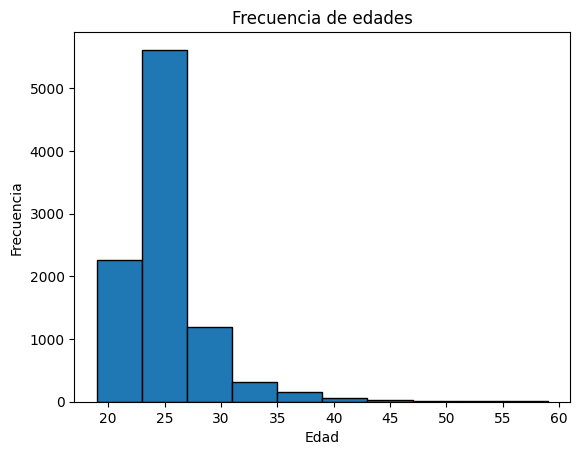

In [13]:
# Grafica de frecuencia de las edades
plt.hist(UD_df['AGE'], bins=10, edgecolor='black')
plt.title('Frecuencia de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()



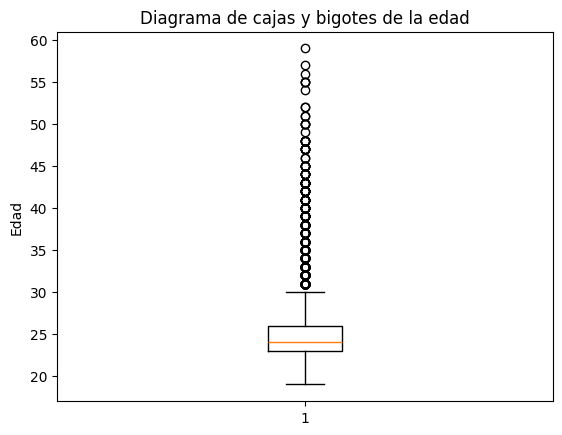

In [14]:
# Diagrama de  cajas y bigotes de la edad
plt.boxplot(UD_df['AGE'])
plt.title('Diagrama de cajas y bigotes de la edad')
plt.ylabel('Edad')
plt.show()